# kelompok dataset ikan bala dan ikan ko'i



In [1]:
# IMPORT LIBRARY
import cv2
import numpy as np
import os
import os.path
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [73]:
# MENGHUBUNGKAN DENGAN GOOGLE DRIVE
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
# menentukan lokasi atau folder dataset
lokasi_dataset = "drive/MyDrive/dataset"

# menentukan ukuran tinggi dan lebar
tinggi = 200
lebar = 200
dim = (lebar, tinggi)

# buat variabel penampung data
tampungan = []
x = []

for path,sub_directory,nama_file in os.walk(lokasi_dataset):
  # print (path)
  for name in nama_file:
    # print (name)
    # gabungkan nama file dengan lokasi gambar
    img_path = (os.path.join(path, name))
    # print(img_path)
    # membaca gambar
    image = cv2.imread(img_path)
    # convert to gray
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    # resize gambar
    resize = cv2.resize(gray,dim)
    tampungan.append(resize.flatten())

x = np.array (tampungan)
print(x.shape)

(469, 40000)


In [75]:
# Membuat Train Split Test
from sklearn.model_selection import train_test_split

# Buat variabel labeling untuk kategori
ikan_bala = np.zeros(266)
ikan_emas = np.ones(203)



# Gabungkan semua label menjadi array 1 dimensi
y = np.concatenate((ikan_bala, ikan_emas))

print("Ukuran image:", x.shape)
print("Ukuran label:", y.shape)

# Melakukan train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Ukuran x_train:", x_train.shape)
print("Ukuran x_test:", x_test.shape)
print("Ukuran y_train:", y_train.shape)
print("Ukuran y_test:", y_test.shape)


Ukuran image: (469, 40000)
Ukuran label: (469,)
Ukuran x_train: (328, 40000)
Ukuran x_test: (141, 40000)
Ukuran y_train: (328,)
Ukuran y_test: (141,)


In [76]:
# Membuat Sitem KNN
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Memuat dataset Iris
iris = load_iris()
x = iris.data
y = iris.target

# Inisialisasi model k-NN
k = 3  # Jumlah neighbors terdekat yang akan dipertimbangkan
model = KNeighborsClassifier(n_neighbors=k)

# Melatih model dengan data latih
model.fit(x_train, y_train)

# Memprediksi kelas target untuk data uji
y_pred = model.predict(x_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi: {accuracy}")

Akurasi: 0.8581560283687943


In [77]:
# uji coba pada data testing
from sklearn.metrics import classification_report

# melakukan uji data test
model.fit(x_train,y_train)

# prediksi
prediksi = model.predict(x_test)

print(classification_report(y_test, prediksi))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88        80
         1.0       0.86      0.80      0.83        61

    accuracy                           0.86       141
   macro avg       0.86      0.85      0.85       141
weighted avg       0.86      0.86      0.86       141



In [78]:
# Menghitung Evaluasi Performa
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

model.fit(x_train, y_train)
y_prediksi = model.predict(x_test)

akurasi = accuracy_score(y_test,y_prediksi) * 100
recal = recall_score(y_test, y_prediksi, average='macro') * 100
presisi = precision_score(y_test, y_prediksi, average='macro') * 100

print("Akurasi : " + str(akurasi))
print("Recal   : " + str(recal))
print("Presisi : " + str(presisi))

Akurasi : 85.81560283687944
Recal   : 85.16393442622952
Presisi : 85.83959899749374


<ipython-input-80-6047f7c4b327>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(images), np.array(labels)


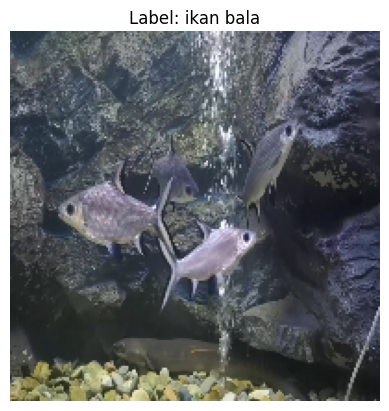

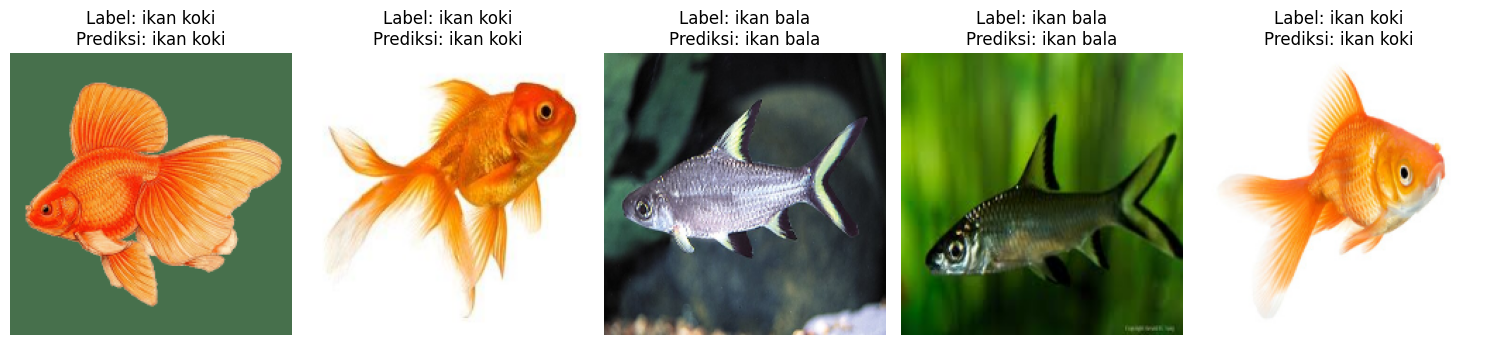

In [80]:
# Path folder gambar uji
dataset_path = "/content/drive/MyDrive/dataset"

# Menentukan kategori klasifikasi
categories = ['ikan bala', 'ikan koki']

# Membaca dataset
def load_dataset(path):
    images = []
    labels = []
    for i, category in enumerate(categories):
        category_path = os.path.join(path, category)
        for image_file in os.listdir(category_path):
            image_path = os.path.join(category_path, image_file)
            image = cv2.imread(image_path)
            if image is not None:
                images.append(image)
                labels.append(i)  # menggunakan indeks kategori sebagai label
    return np.array(images), np.array(labels)

# Memuat dataset
images, labels = load_dataset(dataset_path)

# Mengubah ukuran gambar menjadi dimensi yang seragam
resized_images = [cv2.resize(image, (200, 200)) for image in images]

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(resized_images, labels, test_size=0.2, random_state=42)

# Mengubah gambar menjadi vektor fitur
X_train_flatten = np.array([image.flatten() for image in X_train])
X_test_flatten = np.array([image.flatten() for image in X_test])

# Membuat dan melatih model KNN
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train_flatten, y_train)

# Mengambil contoh gambar dari data uji
sample_image = X_test[0]
sample_label = y_test[0]

# Menampilkan contoh gambar
plt.imshow(cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB))
plt.title("Label: {}".format(categories[sample_label]))
plt.axis("off")
plt.show()

# Melakukan prediksi pada data uji
predicted_labels = model.predict(X_test_flatten)

# Menampilkan beberapa contoh gambar dan hasil prediksi
num_examples = 5
sample_indices = np.random.choice(len(X_test_flatten), num_examples, replace=False)
sample_images = X_test_flatten[sample_indices]
sample_labels = y_test[sample_indices]
predicted_categories = [categories[predicted_labels[i]] for i in sample_indices]

# Menampilkan contoh gambar dan hasil prediksi
fig, axes = plt.subplots(1, num_examples, figsize=(15, 5))
for i in range(num_examples):
    axes[i].imshow(cv2.cvtColor(sample_images[i].reshape(200, 200, 3), cv2.COLOR_BGR2RGB))
    axes[i].set_title("Label: {}\nPrediksi: {}".format(categories[sample_labels[i]], predicted_categories[i]))
    axes[i].axis("off")
plt.tight_layout()
plt.show()